Goal: plot results from compute_vals_HL092220

In [1]:
cd

/home/luxx0489


In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import sample
import pickle
import mne
from scipy.stats import circmean,circvar
from sklearn import decomposition
from mne.viz import plot_evoked_topo, plot_evoked

# Section 1

## Fig.0

In [6]:
data_path = './jupyter_projects/StreamingEEG_exp5/'

file_handle = open(data_path +'electrode_pos.obj','rb')
pos = pickle.load(file_handle)
file_handle.close()

folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_HF/"
file_handle = open(folder_path +'/phase_topomap_all.obj','rb')
output = pickle.load(file_handle)
file_handle.close()

ID_list = [6,7,8,9,10,12,14,16,17,18,19,20,21,22]


[Text(1, 0, '0'),
 Text(1, 0, '$\\pi/2$'),
 Text(1, 0, '$\\pi$'),
 Text(1, 0, '$3\\pi/2$'),
 Text(1, 0, '$2\\pi$')]

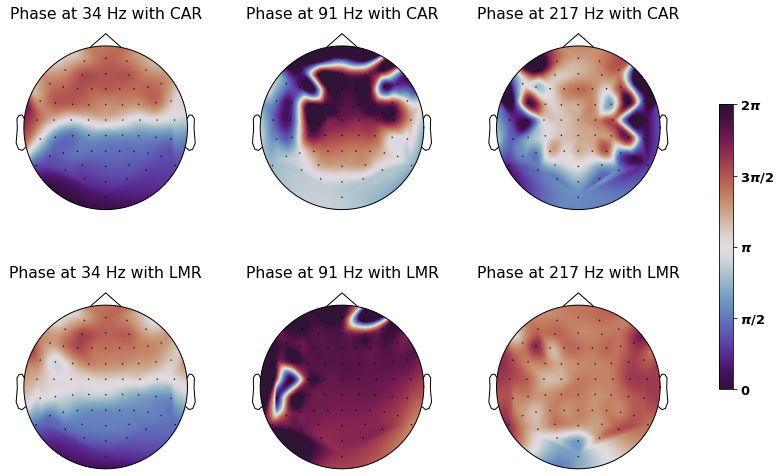

In [58]:
font = {'weight' : 'bold',
        'size'   : 13}

plt.rc('font', **font)

fig,ax = plt.subplots(2,3,figsize=(15,8))

df = pd.DataFrame(output,columns=['ID','reference','frequency']+ ['ch'+str(i+1) for i in range(64)])
df.head()

dictionary = {0:'average',1:'linked mastoid'}

df_f = df.copy().replace({'reference':dictionary})

Freq_names = ['34', '91', '217']
Ref_names = ['CAR','LMR']

for iRow in range(2):

    df_group = df_f.loc[df_f['reference'] == list(dictionary.values())[iRow]].groupby(by = ['frequency'])
    df_avg = df_group.agg(lambda x: circmean(x))

    phase_array = np.array(df_avg[['ch'+str(i+1) for i in range(64)]])

    for iCol in range(3):
        im,_ = mne.viz.plot_topomap(phase_array[iCol],pos,axes=ax[iRow,iCol],vmin=0,vmax=2*np.pi,
                                    show=False,contours=False,cmap='twilight_shifted')
        ax[iRow,iCol].set(title='Phase at '+Freq_names[iCol]+' Hz with '+Ref_names[iRow])
        
bar1 = fig.colorbar(im,ax=ax[:,:],ticks=[0, np.pi/2, np.pi, np.pi/2*3,np.pi*2],shrink=0.6)
bar1.ax.set_yticklabels(['0', r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])


## Fig.1

In [3]:
folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_HF/"
file_handle = open(folder_path +'/absolute_PLV_all.obj','rb')
output = pickle.load(file_handle)
file_handle.close()

ID_list = [6,7,8,9,10,12,14,16,17,18,19,20,21,22]


In [4]:
font = {'weight' : 'regular',
        'size'   : 15}

plt.rc('font', **font)
fig = plt.figure(figsize=(14,8))

freq_list = ['34.28', '91.42', '217.13']




df = pd.DataFrame(output,columns=['ID','reference','frequency']+ ['Fz','Cz','Average'])
df.head()

dictionary = {0:'average',1:'linked mastoid'}

df_f = df.copy().replace({'reference':dictionary})

df_group = df_f.loc[df_f['reference'] == 'average'].groupby(by = ['frequency'])
df_avg = df_group.mean()
df_std = df_group.std()/np.sqrt(len(ID_list))

wid = 0.5
chan_list = ['Cz','Average']
lab_list = ['Single-channel (Cz)', 'All-channel average']
for i in range(2):
    x_tick = [i,i+4,i+8]
    plt.bar(x_tick,df_avg[chan_list[i]],yerr = df_std[chan_list[i]], width=wid,
           color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
#            edgecolor = 'black',
           align='edge',hatch='//', label =lab_list[i] + ' w/ CAR')

df_group = df_f.loc[df_f['reference'] == 'linked mastoid'].groupby(by = ['frequency'])
df_avg = df_group.mean()
df_std = df_group.std()/np.sqrt(len(ID_list))

for i in range(2):
    x_tick = [i+wid,i+wid+4, i+wid+8]
    plt.bar(x_tick,df_avg[chan_list[i]],yerr = df_std[chan_list[i]], width=wid,
                       color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
#           edgecolor = 'black',
           align='edge', label = lab_list[i] + ' w/ LMR')

plt.ylim(0,0.15)
plt.xlabel('Frequency(Hz)')
plt.ylabel('PLV')
plt.xticks((1,5,9),labels=freq_list)

if iSub==0:
    fig.legend(loc='lower center',borderaxespad=0.1,ncol=2)
fig.subplots_adjust(top=0.9, left=0.1, right=0.9, bottom=0.2)  # create some space below the plots by increasing the bottom-value


ValueError: Shape of passed values is (84, 9), indices imply (84, 6)

<Figure size 1008x576 with 0 Axes>

## Fig.2

In [8]:
folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_HF"
file_handle = open(folder_path +'/Fig23_location_PLV_all.obj','rb')
output = pickle.load(file_handle)
file_handle.close()

ID_list = [6,7,8,9,10,12,14,16,17,18,19,20,21,22]


Text(0, 0.5, 'PLV')

<Figure size 1008x576 with 0 Axes>

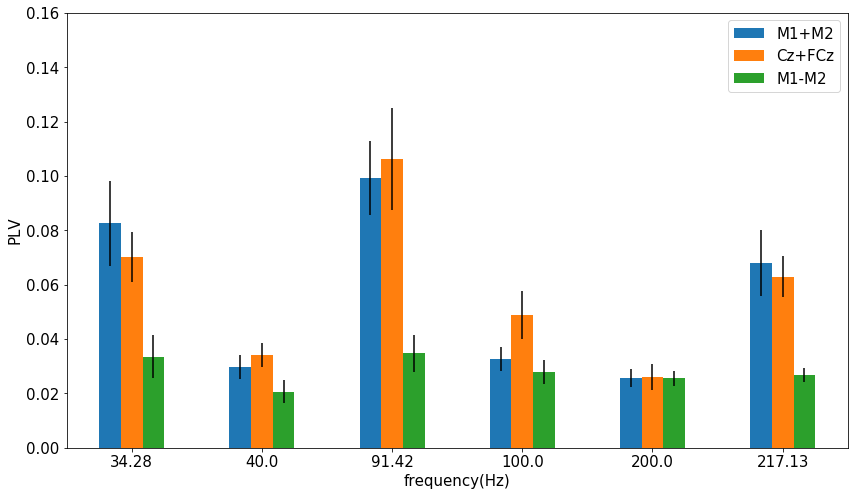

In [24]:
font = {'weight' : 'regular',
        'size'   : 15}

plt.rc('font', **font)

plt.figure(figsize=(14,8))

Freq_set = {34.28, 91.42, 217.13, 40, 100, 200}

label = [output[iE,1] in Freq_set for iE in range(output.shape[0])]
df = pd.DataFrame(output[label,0:5],columns=['ID','frequency(Hz)']+ ['M1+M2','M1-M2','Cz+FCz'])
df.head()

df_f = df
df_group = df_f.groupby(by=['frequency(Hz)'])
df_avg = df_group.mean()
df_std = df_group.std()/np.sqrt(len(ID_list))
df_avg.drop(columns='ID')
ax = df_avg[['M1+M2','Cz+FCz','M1-M2']].plot(kind='bar',yerr=df_std,ylim=(0,0.16),rot=0, figsize=(14,8))
Freq_set = {34.28, 217.13}
ax.set_ylabel('PLV')

In [21]:
from scipy.stats import ttest_rel

freq_pairs = [[34.28, 40], [91.42, 100], [217.13,200]]
montage_list = ['M1+M2','M1-M2','Cz+FCz']
for iMontage in range(len(montage_list)):
    print(montage_list[iMontage])
    for iPairs in range(len(freq_pairs)):
        res = ttest_rel(df[df['frequency(Hz)'] == freq_pairs[iPairs][0]][montage_list[iMontage]],df[df['frequency(Hz)'] == freq_pairs[iPairs][1]][montage_list[iMontage]])
        print(res)

M1+M2
Ttest_relResult(statistic=3.9181948522256027, pvalue=0.0017644114448966074)
Ttest_relResult(statistic=5.208425556059157, pvalue=0.00016860172487789384)
Ttest_relResult(statistic=3.327875068127615, pvalue=0.005447632632907072)
M1-M2
Ttest_relResult(statistic=1.8796768496357614, pvalue=0.08274992330055965)
Ttest_relResult(statistic=1.0546072536347864, pvalue=0.31081164306913855)
Ttest_relResult(statistic=0.33285355269884515, pvalue=0.7445515208218334)
Cz+FCz
Ttest_relResult(statistic=3.817810484828768, pvalue=0.002133932208058955)
Ttest_relResult(statistic=4.239720258834817, pvalue=0.0009654711794271551)
Ttest_relResult(statistic=3.912769304796273, pvalue=0.0017826005842906001)


Text(0, 0.5, 'PLV')

<Figure size 1008x576 with 0 Axes>

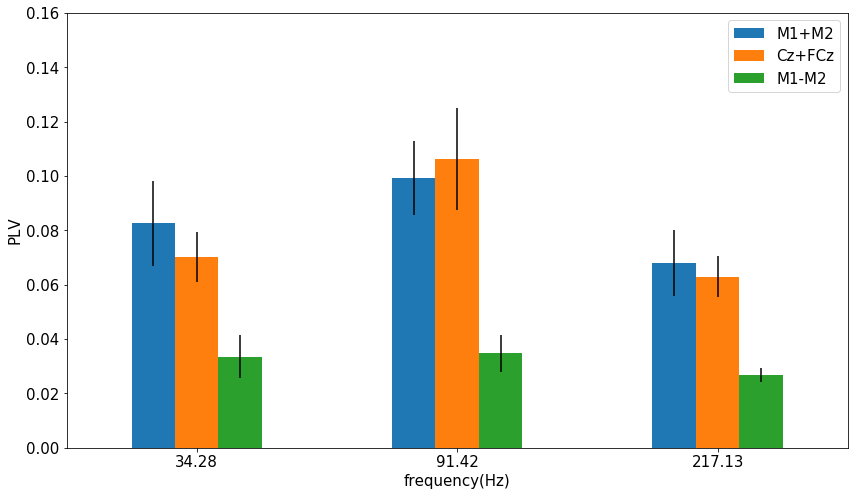

In [22]:
font = {'weight' : 'regular',
        'size'   : 15}

plt.rc('font', **font)

plt.figure(figsize=(14,8))

Freq_set = {34.28, 91.42, 217.13}

label = [output[iE,1] in Freq_set for iE in range(output.shape[0])]
df = pd.DataFrame(output[label,0:5],columns=['ID','frequency(Hz)']+ ['M1+M2','M1-M2','Cz+FCz'])
df.head()

df_f = df
df_group = df_f.groupby(by=['frequency(Hz)'])
df_avg = df_group.mean()
df_std = df_group.std()/np.sqrt(len(ID_list))
df_avg.drop(columns='ID')
ax = df_avg[['M1+M2','Cz+FCz','M1-M2']].plot(kind='bar',yerr=df_std,ylim=(0,0.16),rot=0, figsize=(14,8))
Freq_set = {34.28, 217.13}
ax.set_ylabel('PLV')

## Fig.3

(0, 6.283185307179586)

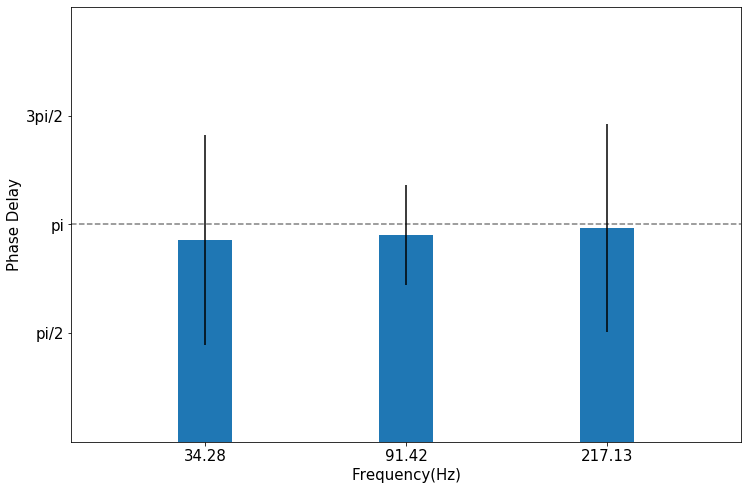

In [14]:
font = {'weight' : 'regular',
        'size'   : 15}

plt.rc('font', **font)

plt.figure(figsize=(12,8))

Freq_list = [34.28, 91.42, 217.13]


ind = output[:,1] == Freq_list[0]
y1 = circmean(output[ind,5]-output[ind,7],np.pi*2,0)
e1 = circvar(output[ind,5]-output[ind,7],np.pi*2,0)
ind = output[:,1] == Freq_list[1]
y2 = circmean(output[ind,5]-output[ind,7],np.pi*2,0)
e2 = circvar(output[ind,5]-output[ind,7],np.pi*2,0)
ind = output[:,1] == Freq_list[2]
y3 = circmean(output[ind,5]-output[ind,7],np.pi*2,0)
e3 = circvar(output[ind,5]-output[ind,7],np.pi*2,0)


plt.bar([2,5,8],[y1,y2,y3],yerr=[e1,e2,e3])
plt.xticks([2,5,8],[str(iE) for iE in Freq_list])
plt.yticks([np.pi/2,np.pi,np.pi/2*3],['pi/2','pi','3pi/2'])
plt.xlabel('Frequency(Hz)')
plt.ylabel('Phase Delay')
plt.axhline(y=np.pi,color='k',alpha=0.5, linestyle='--')
plt.xlim(0,10)
plt.ylim(0,np.pi*2)

## Fig.4

In [26]:
folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_HF"
file_handle = open(folder_path +'/method_comparison_all.obj','rb')
output = pickle.load(file_handle)
file_handle.close()

ID_list = [6,7,8,9,10,12,14,16,17,18,19,20,21,22]


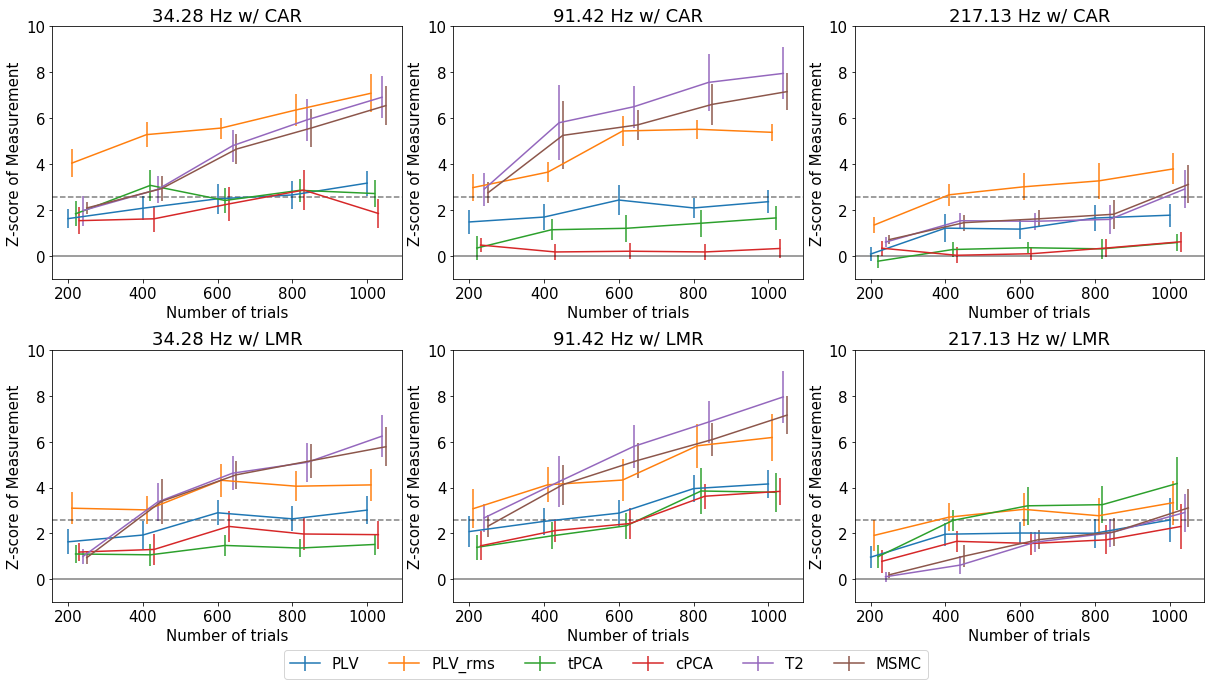

In [28]:
font = {'weight' : 'regular',
        'size'   : 15}

plt.rc('font', **font)

df = pd.DataFrame(output[:,:],columns=['ID','reference','frequency','sample size']+
                  ['PLV','ITC','PLV_Cz','ITC_Cz','plv_mean','itc_mean','plv_rms','itc_rms','T2','cpca','tpca','msmc'])

dictionary = {0:'average',1:'linked mastoid'}
fig = plt.figure(figsize=(20,10))
Freq_list = [34.28,91.42,217.13]
Ref_list = ['CAR','LMR']
method_list = ['PLV','plv_rms','tpca','cpca','T2','msmc']
method_name_list =  ['PLV','PLV_rms','tPCA','cPCA','T2','MSMC']
for iFreq in range(3):
    
    for iRef in range(2):
        
        plt.subplot(2,3,iFreq+iRef*3+1)
        df_f = df.copy()[(df['frequency']== Freq_list[iFreq]) & (df['reference']==iRef)].replace({'reference':dictionary})

        df_group = df_f.groupby(by=['frequency','reference','sample size'])
        df_avg = df_group.mean()
        df_std = df_group.std()/np.sqrt(len(ID_list))
        df_avg.drop(columns='ID')

        
        plt.axhline(y=2.58,color='k',alpha=0.5,linestyle='--')
        plt.axhline(y=0, color='k', alpha=0.5)
        

        for i in range(len(method_list)):
            x_tick = np.linspace(200,1000,5)
            plt.errorbar(x_tick+i*10,df_avg[method_list[i]],yerr = df_std[method_list[i]],
                   color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i], label=method_name_list[i])
        
        plt.xlabel('Number of trials')    
        plt.title(str(Freq_list[iFreq]) +' Hz w/ '+Ref_list[iRef])
        plt.ylim(-1,10)
        plt.ylabel('Z-score of Measurement')
        
        if iFreq==0 and iRef==0:
            fig.legend(loc='lower center',borderaxespad=0.1,ncol=6)

    plt.tight_layout()
    
fig.subplots_adjust(top=0.9, left=0.1, right=0.9, bottom=0.1)  # create some space below the plots by increasing the bottom-value


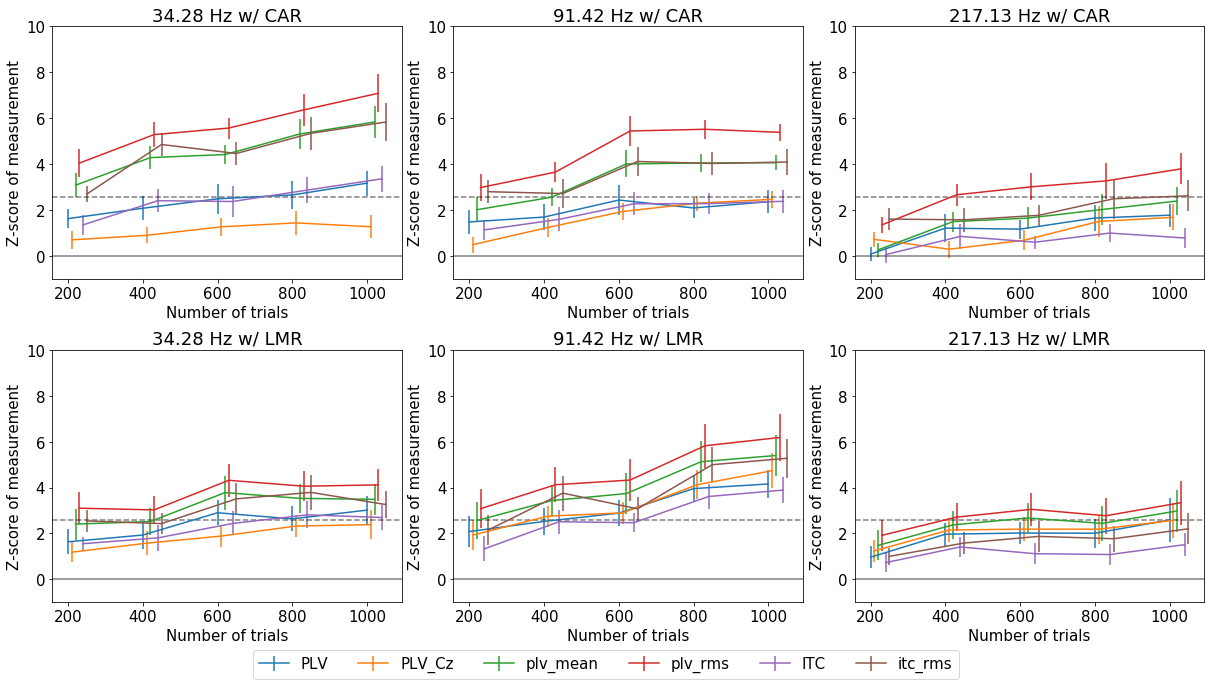

In [30]:
df = pd.DataFrame(output[:,0:16],columns=['ID','reference','frequency','sample size']+
                  ['PLV','ITC','PLV_Cz','ITC_Cz','plv_mean','itc_mean','plv_rms','itc_rms','T2','cpca','tpca','msmc'])

dictionary = {0:'average',1:'linked mastoid'}
fig = plt.figure(figsize=(20,10))
Freq_list = [34.28,91.42,217.13]
Ref_list = ['CAR','LMR']
method_list = ['PLV','PLV_Cz','plv_mean','plv_rms','ITC','itc_rms']
method_name_list =  ['PLV','PLV_Cz','plv_mean','plv_rms','ITC','itc_rms']
for iFreq in range(3):
    
    for iRef in range(2):
        
        plt.subplot(2,3,iFreq+iRef*3+1)
        df_f = df.copy()[(df['frequency']== Freq_list[iFreq]) & (df['reference']==iRef)].replace({'reference':dictionary})

        df_group = df_f.groupby(by=['frequency','reference','sample size'])
        df_avg = df_group.mean()
        df_std = df_group.std()/np.sqrt(len(ID_list))
        df_avg.drop(columns='ID')

        
        plt.axhline(y=2.58,color='k',alpha=0.5,linestyle='--')
        plt.axhline(y=0, color='k', alpha=0.5)
        

        for i in range(len(method_list)):
            x_tick = np.linspace(200,1000,5)
            plt.errorbar(x_tick+i*10,df_avg[method_list[i]],yerr = df_std[method_list[i]],
                   color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i], label=method_name_list[i])
        
        plt.xlabel('Number of trials')    
        plt.title(str(Freq_list[iFreq]) +' Hz w/ '+Ref_list[iRef])
        plt.ylim(-1,10)
        plt.ylabel('Z-score of measurement')
        
        if iFreq==0 and iRef==0:
            fig.legend(loc='lower center',borderaxespad=0.1,ncol=6)

    plt.tight_layout()
    
fig.subplots_adjust(top=0.9, left=0.1, right=0.9, bottom=0.1)  # create some space below the plots by increasing the bottom-value
